In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## PREPARE DATA

In [2]:
# Read 12 csv files (from Jan to Dec of 2022)
import glob
import os

folder_name = 'dataset'
file_type = 'csv'
seperator =','
df = pd.concat([pd.read_csv(f, sep=seperator) for f in glob.glob(folder_name + "/*."+file_type)], ignore_index=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5667717 entries, 0 to 5667716
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 562.1+ MB


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [5]:
print('The dataset has', df.shape[0], 'rows and', df.shape[1], 'columns.')

The dataset has 5667717 rows and 13 columns.


## PROCESS DATA

In [6]:
# Check the data for duplicates
print('Shape before dropping duplicates', df.shape)
df = df.drop_duplicates()
print('Shape after dropping duplicates', df.shape)

Shape before dropping duplicates (5667717, 13)
Shape after dropping duplicates (5667717, 13)


=> The data has no duplicates

In [7]:
# Check the data for missing values
print(np.sum(df.isnull()), '\n')

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64 



=> There are lots of missing values at 6 columns named: **start_station_name, start_station_id, end_station_name, end_station_id, end_lat, end_lng**. However, they do not affect my analysis, so I will ignore them.

In [8]:
df = df.drop(['start_station_name', 'start_station_id', 'end_station_name',
              'end_station_id', 'end_lat', 'end_lng'], axis=1)

In [9]:
# Convert string into datetime
df['ended_at'] = df['ended_at'].astype('datetime64[ns]')
df['started_at'] = df['started_at'].astype('datetime64[ns]')

In [10]:
# Create a column called 'ride_length'
# Calculate the length of each ride by subtracting the column 'started_at' from the column 'ended_at'
df['ride_length'] = df['ended_at'] - df['started_at']

In [11]:
# Create a column called 'ride_length_in_minutes'
df['ride_length_in_minutes'] = df['ride_length'].dt.total_seconds().div(60).round(3)

In [12]:
# Create a column called 'day_of_week'
# Calculate the day of the week that each ride started
df['day_of_week'] = df['started_at'].dt.dayofweek

In [13]:
# Create a column called 'day_name_of_week'
df['day_name_of_week'] = df['started_at'].dt.day_name()

In [14]:
# Create a column called 'month'
df['month'] = df['started_at'].dt.month_name()

In [15]:
# Create a column called 'hour'
df['hour'] = df['started_at'].dt.hour

In [16]:
df.head().sort_values(by='month', ascending=True)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,ride_length_in_minutes,day_of_week,day_name_of_week,month,hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,42.012800,-87.665906,casual,00:02:57,2.950,3,Thursday,January,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,42.012763,-87.665968,casual,00:04:21,4.350,0,Monday,January,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,41.925602,-87.653708,member,00:04:21,4.350,1,Tuesday,January,4
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,41.983593,-87.669154,casual,00:14:56,14.933,1,Tuesday,January,0
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,41.877850,-87.624080,member,00:06:02,6.033,3,Thursday,January,1


# ANALYZE

### Check 'ride_length' and 'ride_length_in_minutes'

In [17]:
# Check 'ride_length' and 'ride_length_in_minutes'
df['ride_length'].describe()

count                   5667717
mean     0 days 00:19:26.597144
std      0 days 02:56:07.687857
min           -8 days +19:26:39
25%             0 days 00:05:49
50%             0 days 00:10:17
75%             0 days 00:18:28
max            28 days 17:47:15
Name: ride_length, dtype: object

In [18]:
df['ride_length_in_minutes'].describe().apply(lambda x: format(x, 'f'))

count    5667717.000000
mean          19.443286
std          176.128131
min       -10353.350000
25%            5.817000
50%           10.283000
75%           18.467000
max        41387.250000
Name: ride_length_in_minutes, dtype: object

In [19]:
print('Max of ride_length:', max(df['ride_length']), '~', max(df['ride_length_in_minutes']), 'mins')
print('Min of ride_length:', min(df['ride_length']), '~', min(df['ride_length_in_minutes']), 'mins')
print('Mean of ride_length:', df['ride_length'].mean(), '~', df['ride_length_in_minutes'].mean(), 'mins')
print('Mode of ride_length:', df['ride_length'].mode(), '~', df['ride_length_in_minutes'].mode(), 'mins')
print('Median of ride_length:', df['ride_length'].median(), '~', df['ride_length_in_minutes'].median(), 'mins')

Max of ride_length: 28 days 17:47:15 ~ 41387.25 mins
Min of ride_length: -8 days +19:26:39 ~ -10353.35 mins
Mean of ride_length: 0 days 00:19:26.597144 ~ 19.443285583948505 mins
Mode of ride_length: 0   00:05:23
dtype: timedelta64[ns] ~ 0    5.383
dtype: float64 mins
Median of ride_length: 0 days 00:10:17 ~ 10.283 mins


### Annual members Vs. Casual riders

**The number of Annual members and Casual riders**

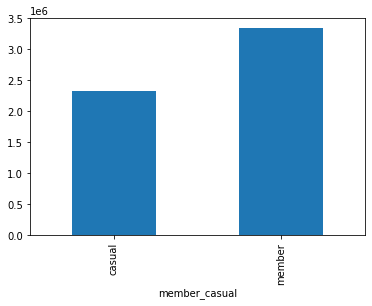

In [20]:
df_1 = df.groupby(['member_casual']).member_casual.count()
df_1.plot.bar();

In [21]:
df_1

member_casual
casual    2322032
member    3345685
Name: member_casual, dtype: int64

=> The number of annual members is higher than casual riders in 2022

In [22]:
# Create pivot table by weekdays
df_pivot_1 = pd.pivot_table(df, values='ride_id', index='day_name_of_week', columns='member_casual',
                          aggfunc='count')
df_pivot_1

member_casual,casual,member
day_name_of_week,,
Friday,334701,467086
Monday,277675,473339
Saturday,473190,443281
Sunday,389036,387223
Thursday,309330,532261
Tuesday,263746,518626
Wednesday,274354,523869


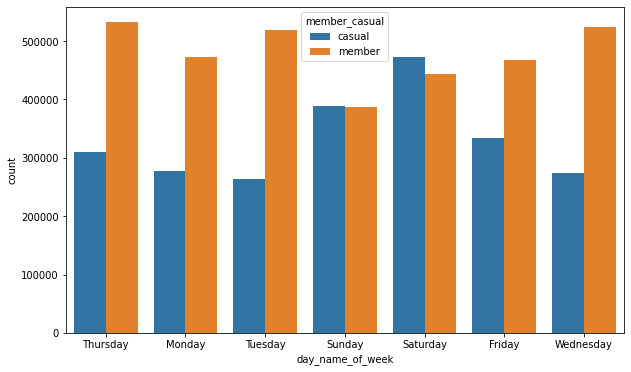

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='day_name_of_week',data=df, hue='member_casual');

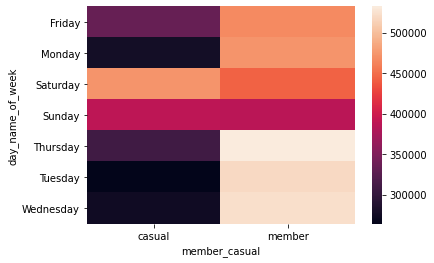

In [43]:
sns.heatmap(df_pivot_1);

=> The number of annual members is higher than casual riders by weekdays except Saturday and Sunday in 2022

In [24]:
# Create pivot table by months
df_pivot_2 = pd.pivot_table(df, values='ride_id', index='month', columns='member_casual',
                          aggfunc='count')
df_pivot_2

member_casual,casual,member
month,,
April,126417,244832
August,358924,427008
December,44894,136912
February,21416,94193
January,18520,85250
July,406055,417433
June,369051,400153
March,89882,194160
May,280415,354443


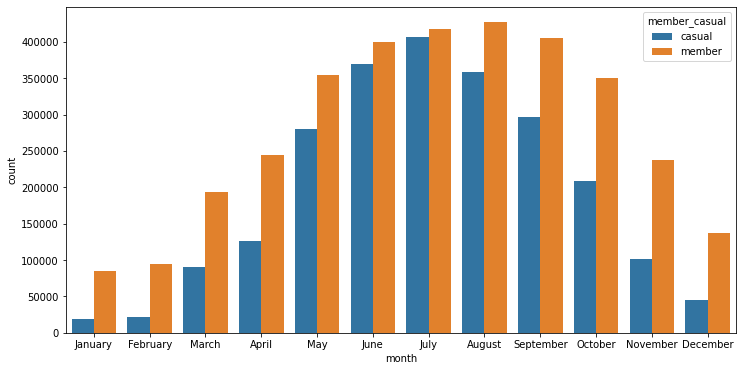

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='month',data=df, hue='member_casual');

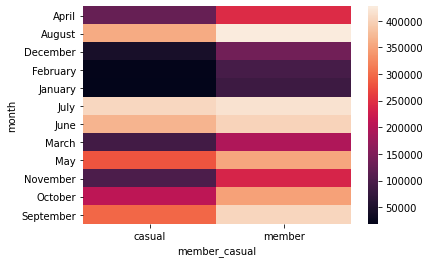

In [42]:
sns.heatmap(df_pivot_2);

=> The number of annual members is higher than casual riders by months in 2022

**The average of Annual members and Casual riders**

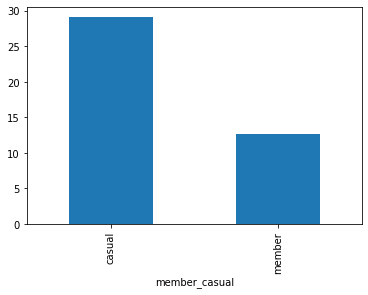

In [26]:
df_2 = df.groupby(['member_casual']).ride_length_in_minutes.mean()
df_2.plot.bar();

In [27]:
df_2

member_casual
casual    29.144294
member    12.710419
Name: ride_length_in_minutes, dtype: float64

=> The average of ride length of casual riders is higher than annual members in 2022

In [28]:
# Create pivot table by weekdays
df_pivot_3 = pd.pivot_table(df, values='ride_length_in_minutes', index='day_name_of_week', columns='member_casual',
                          aggfunc='mean')
df_pivot_3

member_casual,casual,member
day_name_of_week,,
Friday,28.043991,12.530686
Monday,29.186939,12.269995
Saturday,32.613711,14.139806
Sunday,34.053443,14.029136
Thursday,25.547652,12.292261
Tuesday,25.818409,12.128743
Wednesday,24.750845,12.085079


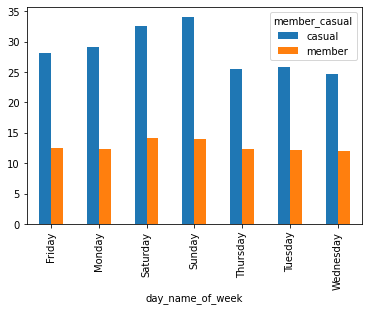

In [36]:
df_pivot_3.plot.bar();

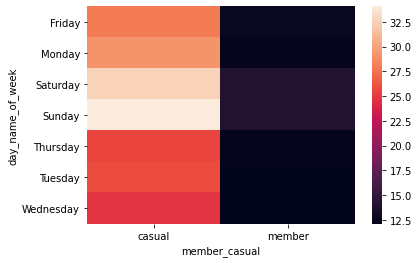

In [60]:
sns.heatmap(df_pivot_3);

=> The average of ride length of casual riders is higher than annual members by weekdays in 2022

In [30]:
# Create pivot table by months
df_pivot_4 = pd.pivot_table(df, values='ride_length_in_minutes', index='month', columns='member_casual',
                          aggfunc='mean')
df_pivot_4

member_casual,casual,member
month,,
April,29.532427,11.492404
August,29.310048,13.384163
December,22.289564,10.619487
February,26.708452,11.405528
January,30.377456,11.981511
July,29.278088,13.718340
June,32.096975,13.998434
March,32.622390,11.958329
May,30.869611,13.366677


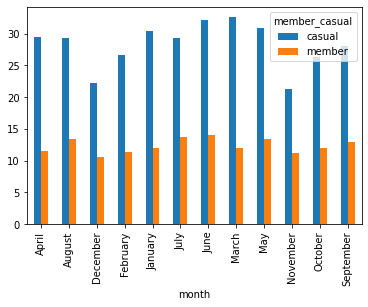

In [35]:
df_pivot_4.plot.bar();

=> The average of ride length of casual riders is higher than annual members by months in 2022

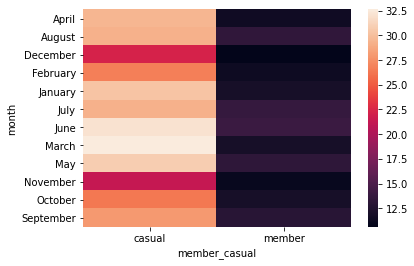

In [61]:
sns.heatmap(df_pivot_4);

**Check the relationship between 'month' and 'day_name_of_week'**

In [37]:
df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,member_casual,ride_length,ride_length_in_minutes,day_of_week,day_name_of_week,month,hour
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,42.012800,-87.665906,casual,00:02:57,2.95,3,Thursday,January,11
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,42.012763,-87.665968,casual,00:04:21,4.35,0,Monday,January,8
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,41.925602,-87.653708,member,00:04:21,4.35,1,Tuesday,January,4


In [44]:
df_pivot_5 = pd.pivot_table(df, values='ride_id', index='month', columns='day_name_of_week',
                          aggfunc='count')
df_pivot_5

day_name_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,52813,45994,74397,44845,55374,54982,42844
August,115571,104965,118076,91126,99863,128227,128104
December,26818,23825,24566,17460,35272,28025,25840
February,14658,22780,12487,15892,13514,19046,17232
January,13811,15803,14770,11509,16554,16149,15174
July,118149,93821,164099,137031,108948,98979,102461
June,113190,83796,114831,114913,131479,93811,117184
March,27648,43898,34631,38643,44165,44560,50497
May,74548,109530,97850,104095,85062,94610,69163


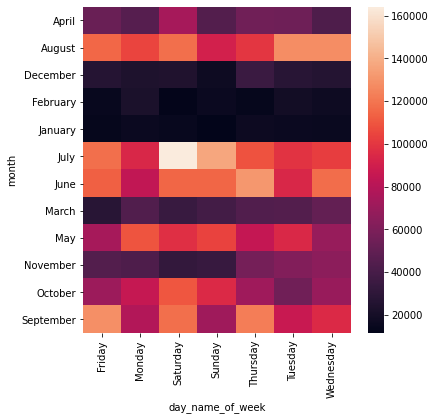

In [52]:
plt.figure(figsize=(6, 6))
sns.heatmap(df_pivot_5);

**Check the relationship between 'hour' and 'day_name_of_week'**

In [62]:
df_pivot_6 = pd.pivot_table(df, values='ride_id', index='day_name_of_week', columns='hour',
                          aggfunc='count')
df_pivot_6

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name_of_week,,,,,,,,,,,,,,,,,,,,,
Friday,10337,6057,3453,2202,2189,6696,19676,31940,36374,28246,...,49396,59437,69527,78001,68839,51664,36755,29611,28485,24984
Monday,7392,4130,2670,1946,2223,6913,18926,34427,40702,27960,...,43320,51039,68212,85476,69998,50020,35346,26657,18551,11062
Saturday,20929,15678,8961,4927,2643,3444,7489,13924,24568,37506,...,70699,72546,71172,67246,62246,49991,37185,33447,32802,29976
Sunday,24618,16489,10867,5999,3658,3718,6602,11014,17578,29310,...,62973,65954,64337,59438,51534,39540,28820,23169,18935,12112
Thursday,7391,3817,2167,1541,1881,7536,21956,43575,52127,31974,...,42288,53121,73412,93780,79402,57618,41129,34361,29367,17792
Tuesday,5735,3016,1745,1291,2096,8343,23653,45740,52006,30298,...,37744,49332,70904,91634,73109,53287,37002,29710,21061,11803
Wednesday,6149,3153,1717,1261,1871,8069,22379,43411,50938,30843,...,38546,48347,71930,94018,77050,55620,40432,32407,24330,13891


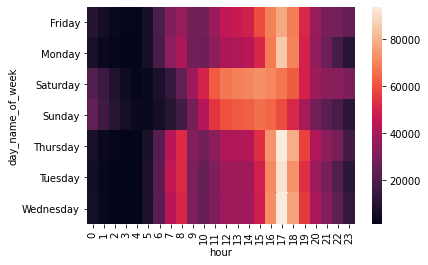

In [68]:
sns.heatmap(df_pivot_6);

In [70]:
# Save clean data as a csv file
df.to_csv('clean_data.csv')

## SUMMARY OF ANALYSIS

- How should you organize your data to perform analysis on it?
- Has your data been properly formatted?
- What surprises did you discover in the data?
- What trends or relationships did you find in the data?
- How will these insights help answer your business questions?